1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues Covariance:
 [2.92590092e+01+0.j 1.54908105e-15+0.j 1.83238306e+00+0.j]

Eigenvectors Covariance:
 [[-0.11523671 -0.81649658  0.56573301]
 [-0.57764189 -0.40824829 -0.70686857]
 [-0.80811531  0.40824829  0.42459744]]

Eigenvalues SVD:
 [2.92549295e+04 1.83180636e+03 1.83232503e-27]

Eigenvectors SVD:
 [[-0.11535276  0.56570936 -0.81649658]
 [-0.57749687 -0.70698705 -0.40824829]
 [-0.80820239  0.42443166  0.40824829]]

The percentual of dataset variability is:  94.10646187567441 %



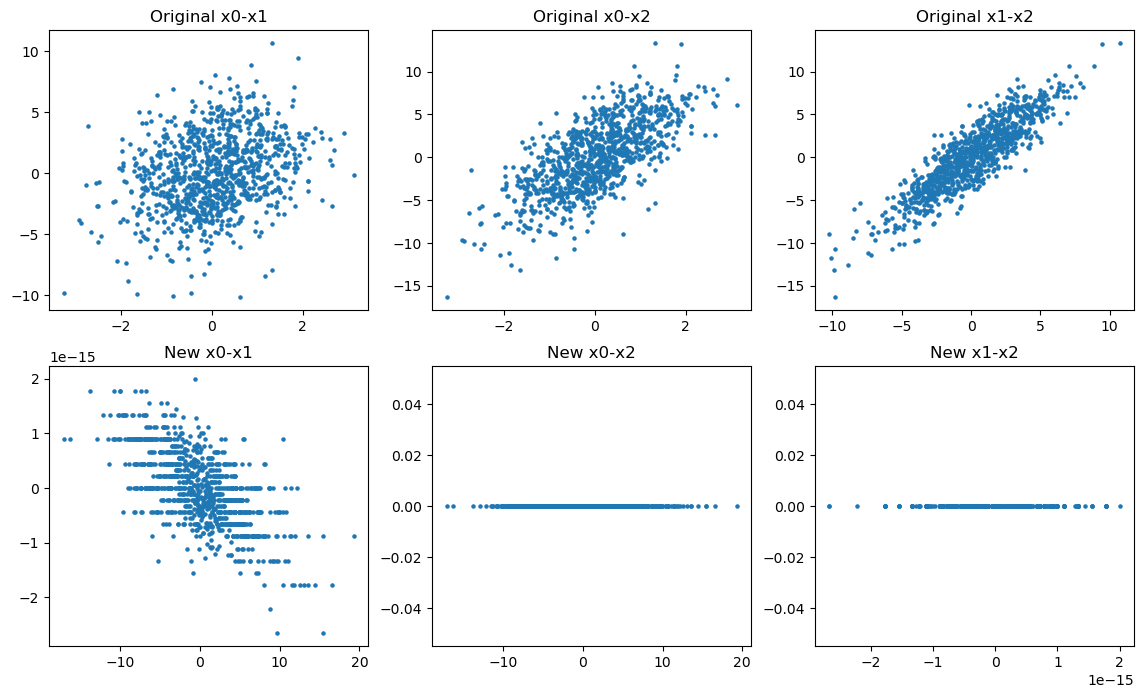

In [27]:
from re import M
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt

N = 1000

mu1, sigma1 = 0, 1
x1 = np.random.normal(mu1, sigma1, N)

mu2, sigma2 = 0, 3
x2 = x1 + np.random.normal(mu2, sigma2, N)

x3 = 2*x1 + x2

data = np.vstack((x1, x2, x3))

cov_matrix = np.cov(data)
eigenvalsc, eigenvecsc=la.eig(cov_matrix)
index = evalsc.argsort()[::-1]
eigenvalsc = eigenvalsc[index]
eigenvecsc = eigenvecsc[:,index]


print("Eigenvalues Covariance:\n", eigenvalsc)
print("\nEigenvectors Covariance:\n", eigenvecsc)


U, s, VT = la.svd(data, full_matrices=False)

eigenvecsc_svd = U
eigenvalsc_svd = s**2
eigenvecsc_eig = eigenvecsc
eigenvecsc_svd = U
np.allclose(eigenvecsc_eig, eigenvecsc_svd)


eigenvalsc_eig = eigenvalsc
eigenvalsc_svd = s**2
np.allclose(eigenvalsc_eig,eigenvalsc_svd)


print("\nEigenvalues SVD:\n", eigenvalsc_svd)
print("\nEigenvectors SVD:\n", eigenvecsc_svd)

var = np.real(np.sum(eigenvalsc[:2])/np.sum(eigenvalsc))*100
print("\nThe percentual of dataset variability is: ", var, "%\n")

eigen_vecs_cov_pca = eigenvecsc[:,:2]
data_pca = np.dot(eigen_vecs_cov_pca.T, dataset)
data_pca = np.vstack([data_pca, np.zeros((1, N))]) 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))
[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(dataset[0], dataset[1], s= 5)
ax01.set_title('Original x0-x1')
ax02.scatter(dataset[0], dataset[2], s= 5)
ax02.set_title('Original x0-x2')
ax03.scatter(dataset[1], dataset[2], s= 5)
ax03.set_title('Original x1-x2')
ax11.scatter(data_pca[0], data_pca[1], s= 5)
ax11.set_title('New x0-x1')
ax12.scatter(data_pca[0], data_pca[2], s= 5)
ax12.set_title('New x0-x2')
ax13.scatter(data_pca[1], data_pca[2], s= 5)
ax13.set_title('New x1-x2')

plt.show()



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [25]:
noise=[]
for i in range(10):
    noise.append(np.random.normal(loc=mean_1, scale=(std_1)/20, size=N))

data_n = np.vstack([dataset, noise[0], noise[1], noise[2], noise[3], noise[4], noise[5], noise[6], noise[7], noise[8], noise[9]])
mcovn = np.cov(data_n)
eigenvalscn, eigenvecscn = np.linalg.eig(mcovn)
UN, SN, VN = np.linalg.svd(data_n) 
eigenvalsvdn = SN**2/(N-1)
eigenvecsvdn = UN

print("Eigenvalues Covariance with Noise:\n", eigenvalsc)
print("\nEigenvectors Covariance with Noise:\n", eigenvecsc)
print("\nEigenvalues SVD with Noise:\n", eigenvalsc_svd)
print("\nEigenvectors SVD with Noise:\n", eigenvecsc_svd)

eigenvecsc_pcan = eigenvecscn[:,:2]
data_pcn = np.dot(eigenvecsc_pcan.T, data_n)
data_pcn = np.vstack([data_pcn, np.zeros((1, N))]) 
print(data_pcn)

Eigenvalues Covariance with Noise:
 [2.63013664e+01+0.j 9.59964521e-16+0.j 2.03174474e+00+0.j]

Eigenvectors Covariance with Noise:
 [[-0.12436612 -0.81649658  0.56379642]
 [-0.56614065 -0.40824829 -0.71611319]
 [-0.81487289  0.40824829  0.41147965]]

Eigenvalues SVD with Noise:
 [2.62908491e+04 2.03011287e+03 4.18347506e-28]

Eigenvectors SVD with Noise:
 [[-0.12442452  0.56378353 -0.81649658]
 [-0.56606647 -0.71617183 -0.40824829]
 [-0.81491551  0.41139524  0.40824829]]
[[-0.49247148 -4.92885977  0.08647106 ... -0.01162945  6.99502993
  -0.19720413]
 [-2.56162095  2.48211236  0.22406698 ... -2.06675743 -2.22081372
  -1.17320729]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 